<a href="https://colab.research.google.com/github/jake55457/deepLearning/blob/main/Copy_of_theories_of_dl_ps1_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Training Networks

In this section we will build two Neural Networks, one from scratch, and one based on the high-level functions provided by Tensorflow.

We will build a net from scratch to solve the XOR problem, and to do this we will rely on the backpropagation formulae that you have derived in the problem sheet.

We will also build a network with Tensorflow to introduce you to their API.

## 1(b) XOR problem - NN from Scratch

In this problem we have four possible inputs with two possible outcomes;


> $x_1 = 0, x_2 = 0 \Rightarrow XOR(x_1,x_2)=0$

> $x_1 = 0, x_2 = 1 \Rightarrow XOR(x_1,x_2)=1$

> $x_1 = 1, x_2 = 0 \Rightarrow XOR(x_1,x_2)=1$

> $x_1 = 1, x_2 = 1 \Rightarrow XOR(x_1,x_2)=0$

In the problem sheet you may have noticed that a two layer NN  could solve this problem exactly. Here we will see that on a 2-layer net with Sigmoid activation functions, with a random intialisation and the mean square loss, back-prop is able to converge to a pseudo-optimal solution. We will then consider a visualisation of how the neural network divides the input space as a classifier.



**Exercise** The class for the NeuralNet is already defined except for the backpropagation function, which you have to complete.

Note: Once you have implemented backprop, if you get poor performance, try running the cell again.

In [ ]:
import numpy as np


def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1.0 - sigmoid(x))



class NeuralNetwork:
    def __init__(self, x, y):
        dimension = 2
        self.input        = x
        self.weights1     = np.random.rand(dimension, x.shape[1])      #np.array([[-1,1],[1,-1]], dtype=np.float)
        self.weights2     = np.random.rand(1,dimension)
        self.bias1        = np.random.rand(dimension,1)      #0.5*np.ones((dimension,1))
        self.bias2        = np.random.rand(1,1)
        self.y            = y
        self.output       = np.zeros(self.y.shape)
        self.activation   = sigmoid
        self.d_activation = sigmoid_derivative

    def feedforward(self,x):
        self.x = np.expand_dims(x,axis =1)
        self.layer1 = self.activation(self.weights1 @  self.x + self.bias1)
        self.output = self.activation(self.weights2 @ self.layer1 + self.bias2)

    def call(self,x):
        x = np.expand_dims(x,axis =1)
        layer1 = self.activation(self.weights1 @  x + self.bias1)
        output = self.activation(self.weights2 @ layer1 + self.bias2)
        return output

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights1 = np.zeros(self.weights1.shape)
        d_weights2 = np.zeros(self.weights2.shape)
        d_bias1    = np.zeros(self.bias1.shape)
        d_bias2    = np.zeros(self.bias2.shape)

        for j in range(4): # want to compute gradient per each input image
          single_input = self.input[j]
          self.feedforward(single_input)

          # Calculate the error in the output layer
          output_error = (self.y[j] - self.output) * self.d_activation(self.weights2 @ self.layer1 + self.bias2)

          # Calculate the gradients for the output layer
          d_weights2 += output_error @ self.layer1.T
          d_bias2    += output_error

          # Calculate the error in the hidden layer
          layer1_error = self.weights2.T @ output_error * self.d_activation(self.weights1 @  self.x + self.bias1)

          # Calculate the gradients for the hidden layer
          d_weights1 += layer1_error @ self.x.T
          d_bias1    += layer1_error

        # Update the weights and biases
        learningRate = 10 # from experimenting, higher gives better results!?

        self.weights1 += learningRate*d_weights1
        self.weights2 += learningRate*d_weights2
        self.bias1    += learningRate*d_bias1
        self.bias2    += learningRate*d_bias2


# training date
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0],[1],[1],[0]])

#initialise a NN with the training date.
nn = NeuralNetwork(X,y)

#train on the data by running backprop() 10000 times
for i in range(10000):
    nn.backprop()
for j in range(4):
    nn.feedforward(X[j])
    print('Prediction:\n', nn.x, ' --->' , nn.output)


Prediction:
 [[0]
 [0]]  ---> [[0.00324034]]
Prediction:
 [[0]
 [1]]  ---> [[0.99665875]]
Prediction:
 [[1]
 [0]]  ---> [[0.99666405]]
Prediction:
 [[1]
 [1]]  ---> [[0.0040999]]
Prediction:
 [[-1]
 [ 1]]  ---> [[0.00320245]]


Now we will plot how the domain has been split. In the left figure we will see the outputs of the NN, while on the right we visualise the classification of these outputs i.e. any value above 0.5 identifies class 1, 0 otherwise, which shows us the decision boundary of the classifier.


/tmp/ipython-input-3961887646.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fun_map_2[i,j] = nn.call([mu[i], gamma[j]])


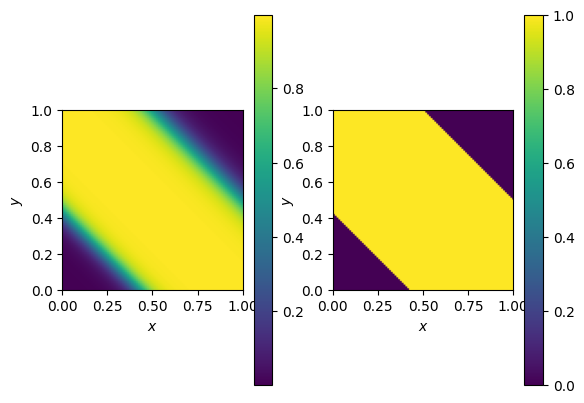

In [ ]:
import matplotlib.pyplot as plt

mu = np.linspace(0,1,100)
gamma = np.linspace(0,1,100)

# filling the heatmap, value by value
fun_map = np.empty((mu.size, gamma.size))
for i in range(mu.size):
    for j in range(gamma.size):
        net_val = nn.call([mu[i], gamma[j]])
        if net_val>0.5:
          fun_map[i,j] = 1
        else:
          fun_map[i,j] = 0

fun_map_2 = np.empty((mu.size, gamma.size))
for i in range(mu.size):
    for j in range(gamma.size):
        fun_map_2[i,j] = nn.call([mu[i], gamma[j]])

fig = plt.figure()
s = fig.add_subplot(1, 2, 1, xlabel='$x$', ylabel='$y$')
im = s.imshow(
    fun_map_2,
    extent=(gamma[0], gamma[-1], mu[0], mu[-1]),
    origin='lower')
fig.colorbar(im)
s = fig.add_subplot(1, 2, 2, xlabel='$x$', ylabel='$y$')
im = s.imshow(
    fun_map,
    extent=(gamma[0], gamma[-1], mu[0], mu[-1]),
    origin='lower')
fig.colorbar(im)


N.B. The transition fase with the sigmoid activation function is sharp, and so the NN more-or-less splits the domain into piecwise constant regions.

## 1(c) Training MNIST

First, we have to upload the dataset; keras, an interface for tensorflow, allows us to do this with a one line command. We then can use the Sequence model class from TF to add different layers to our network.



In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

print(train_images.shape) # Check if images are loaded correctly



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)


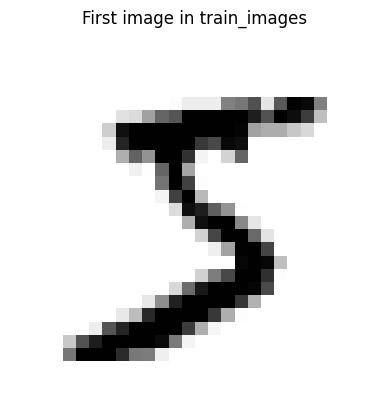

In [ ]:
# display an image from the set so i have something to visualise.

import matplotlib.pyplot as plt

# Display the first image in train_images
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.axis('off')
plt.show()

**Exercise** You now have to generate a two layer network with hidden dimension of 128 via the sequential command in Tensorflow. This should allow you to achieve 92% accuracy with only15 epochs of training!!

In [ ]:
import numpy as np
import keras
#from keras.models import Sequential
#from keras.layers import Dense, Flatten

# Generate data
x_train = train_images
y_train = train_labels

x_test = test_images
y_test = test_labels

# build the architecture with Sequential
# two layer network. input has 28*28 = 784, then intermediatary has 128, then output 10.
model = keras.Sequential(
    [
        keras.Input(shape=(28,28)),
        keras.layers.Flatten(), # Flatten the input image
        keras.layers.Dense(128, activation="relu", name="layer1"),
        keras.layers.Dense(10, activation="softmax", name="layer2"), # Use softmax for classification
    ]
)


# Compile the model, which involved shoows a loss function, an optimiser, and the performance metrics you want to track
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy for integer labels
    # Computes the cross-entropy loss between true labels and predicted labels.
    metrics=['accuracy'], # Change metric to accuracy
)

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train the architecture
#...
model.fit(
    x_train, y_train, epochs=15
)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8253 - loss: 7.0390
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9222 - loss: 0.5231
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9426 - loss: 0.4078
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9474 - loss: 0.4035
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9543 - loss: 0.3444
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9584 - loss: 0.3231
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9645 - loss: 0.2707
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9661 - loss: 0.2610
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9729 - loss: 0.2260
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9724 - loss: 0.2150
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9741 - loss: 0.2151
Epoch 12/15
1875/1875 ━━━━━━━

Test accuracy: 0.9627
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


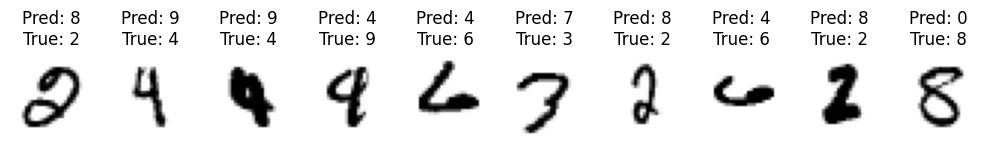

In [ ]:
# test the performance
# ...
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy:.4f}')

# Make predictions
predictions = model.predict(x_test)

# Find misclassified images
misclassified_indices = np.where(np.argmax(predictions, axis=1) != y_test)[0]

# Select up to 10 misclassified images
num_to_display = min(10, len(misclassified_indices))
display_indices = np.random.choice(misclassified_indices, num_to_display, replace=False)

# Plot misclassified images
plt.figure(figsize=(10, 10))
for i, idx in enumerate(display_indices):
    plt.subplot(1, num_to_display, i + 1)
    plt.imshow(x_test[idx], cmap=plt.cm.binary)
    plt.title(f'Pred: {np.argmax(predictions[idx])}\nTrue: {y_test[idx]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# 2. Expressivity

The **$n$-ap problem** was shown to have an optimal solution with a particular construction of neural network. Do we find these coefficients/weights when training a network with that structure from randomly inittialised weights?

## 2(d) Train NN on n-ap problem

Build the net in the case with $n=2^K, K=3$ and check if it converges.

[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875]
[0 1 0 1 0 1 0 1]


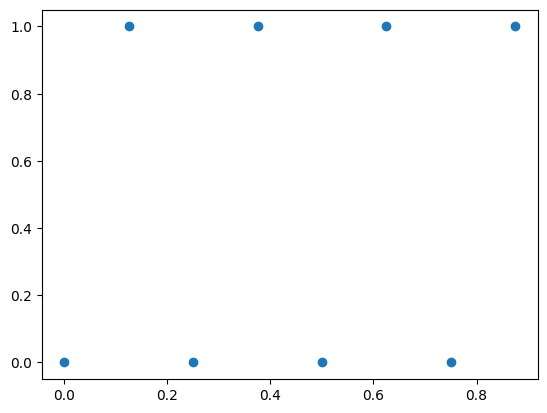

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)


compile_metrics: 50.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Y=0, Predicted=[0.4928047]
Y=1, Predicted=[0.49516216]
Y=0, Predicted=[0.49751508]
Y=1, Predicted=[0.49985963]
Y=0, Predicted=[0.5021917]
Y=1, Predicted=[0.5045076]
Y=0, Predicted=[0.5068034]
Y=1, Predicted=[0.5090755]


In [ ]:
import numpy as np
import keras
#from keras.models import Sequential
#from keras.layers import Dense, Dropout
import math


# m-ap data points
m = 3
x = np.array([],float)
y = np.array([],int)
for k in range(pow(2,m)):
  x = np.append(x,k/pow(2,m))
  y = np.append(y,k%2) # i.e 0 or 1 depending on even or odd

print(x)
print(y)

# Plot the points!
import matplotlib.pyplot as plt
plt.plot(x,y,ls="none",marker='o')
plt.show()

# for training purposes
x_train = x.T
y_train = y

aMethod = 'sigmoid' #putting this here so i can change it later to play...

# Build a model
model = keras.Sequential([
    keras.Input(shape=(1,)),
    keras.layers.Dense(32, activation=aMethod),
    keras.layers.Dense(1, activation=aMethod),
])
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(
    x_train, y_train, epochs=100, verbose=0
)
 # verbose is how much progress updates it gives.

# Evaluate on the training data
scores = model.evaluate(x_train, y_train, verbose=0)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

ynew = model.predict(x_train)
for i in range(len(x_train)):
        print("Y=%s, Predicted=%s" % (y_train[i], ynew[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


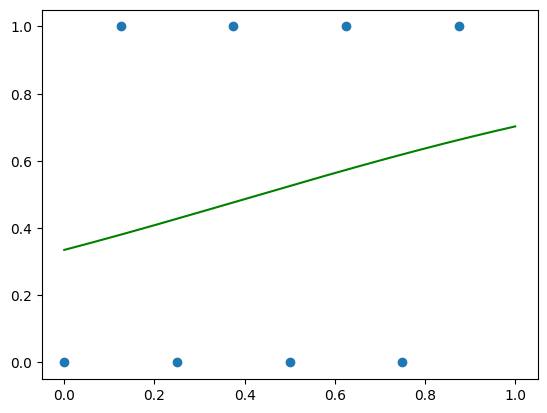

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy

def plot_model(nn,x,y):
  xx = np.linspace(0,1,10000)
  yy = nn.predict(xx)
  fig = plt.figure()
  plt.plot(xx,yy, 'g-')
  plt.plot(x,y, ls='none', marker='o')
  plt.show()

plot_model(model, x_train, y_train)

In [ ]:
#CGPT 1
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# --- Parameters ---
n = 3  # you can adjust this
num_points = 2 * n
x = np.linspace(0, 1 - 2**(-n), num_points).reshape(-1, 1)
y = np.array([0 if i % 2 == 0 else 1 for i in range(num_points)])

# --- Build the model ---
model = keras.Sequential([
    layers.Input(shape=(1,)),               # 1D input
    layers.Dense(2, activation='relu'),     # layer 1
    layers.Dense(2, activation='relu'),     # layer 2
    layers.Dense(2, activation='relu'),     # layer 3
    layers.Dense(2, activation='relu'),     # layer 4
    layers.Dense(2, activation='relu'),     # layer 5
    layers.Dense(2, activation='relu'),     # layer 6
    layers.Dense(1, activation='sigmoid')   # output layer (binary classification)
])

# --- Compile the model ---
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# --- Train the model ---
history = model.fit(x, y, epochs=200, verbose=0)

# --- Evaluate ---
loss, acc = model.evaluate(x, y, verbose=0)
print(f"Training accuracy: {acc*100:.2f}%")


Training accuracy: 50.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


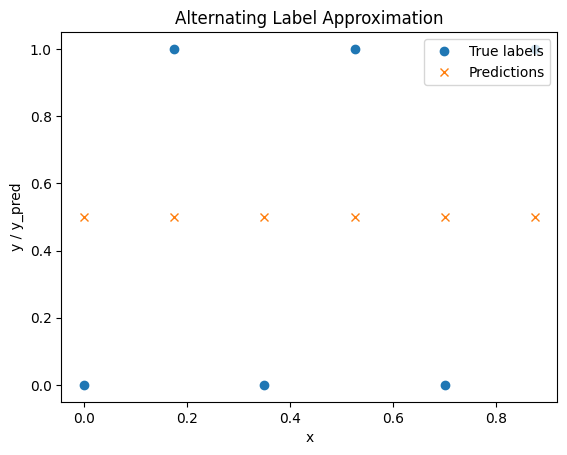

In [ ]:
#cgpt 2
import matplotlib.pyplot as plt

y_pred = model.predict(x).flatten()
plt.plot(x, y, 'o', label='True labels')
plt.plot(x, y_pred, 'x', label='Predictions')
plt.legend()
plt.xlabel("x")
plt.ylabel("y / y_pred")
plt.title("Alternating Label Approximation")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


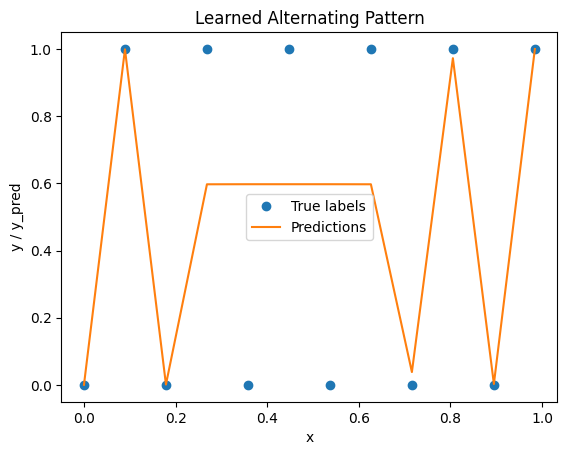

In [ ]:
#cgpt 3
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# --- Generate dataset ---
n = 6  # try increasing this gradually
num_points = 2 * n
x = np.linspace(0, 1 - 2**(-n), num_points).reshape(-1, 1)
y = np.array([0 if i % 2 == 0 else 1 for i in range(num_points)])

# --- Build model ---
model = keras.Sequential([
    layers.Input(shape=(1,)),
    # Use sinusoidal positional encoding to help with high-frequency pattern
    layers.Dense(32, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])

# --- Compile ---
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# --- Train ---
history = model.fit(x, y, epochs=2000, verbose=0)

# --- Evaluate ---
loss, acc = model.evaluate(x, y, verbose=0)
print(f"Training accuracy: {acc*100:.2f}%")

# --- Visualize ---
y_pred = model.predict(x).flatten()
plt.plot(x, y, 'o', label='True labels')
plt.plot(x, y_pred, label='Predictions')
plt.xlabel("x")
plt.ylabel("y / y_pred")
plt.legend()
plt.title("Learned Alternating Pattern")
plt.show()


And now let's plot the modelled function




## 2(e) Perturbed Solution of the n-ap problem

Why is this optimum so hard to find? Let's implement the optimal function directly and see how a small perturbation to the parameters changes the function it computes.

[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875]
[0 1 0 1 0 1 0 1]


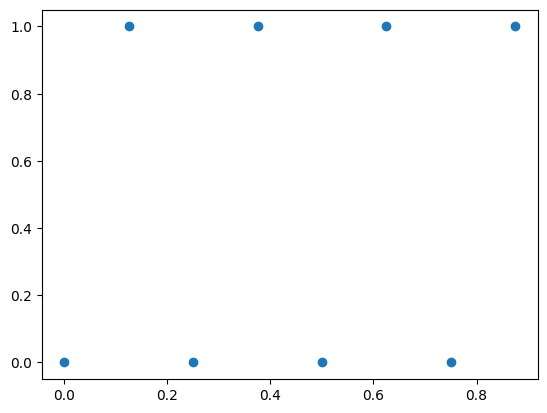

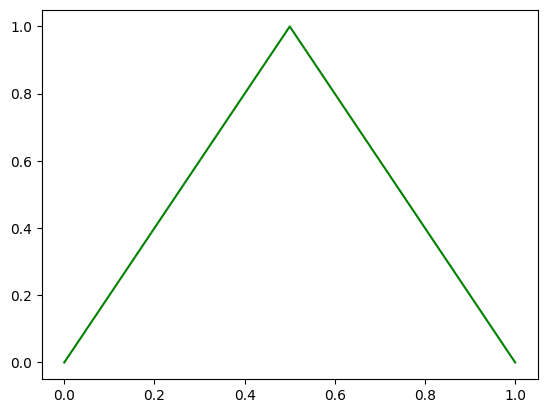

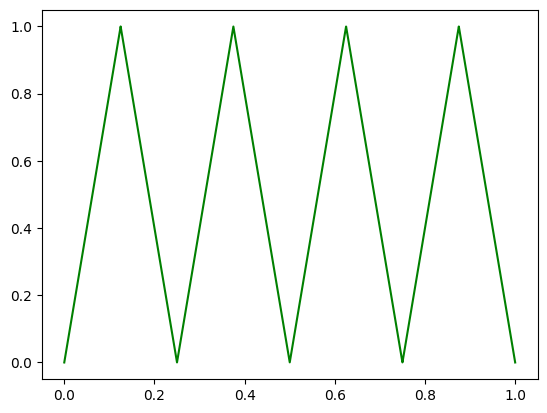

Y=0, Predicted=0.0
Y=1, Predicted=1.0
Y=0, Predicted=0.0
Y=1, Predicted=1.0
Y=0, Predicted=0.0
Y=1, Predicted=1.0
Y=0, Predicted=0.0
Y=1, Predicted=1.0


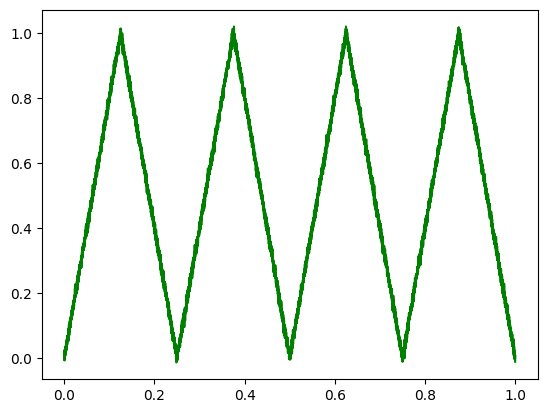

In [ ]:
# hardcode the function
import numpy as np
import keras
#from keras.models import Sequential
#from keras.layers import Dense, Dropout
import math


# m-ap data points
m = 3
x = np.array([],float)
y = np.array([],int)
for k in range(pow(2,m)):
  x = np.append(x,k/pow(2,m))
  y = np.append(y,k%2) # i.e 0 or 1 depending on even or odd

print(x)
print(y)

# Plot the points!
import matplotlib.pyplot as plt
plt.plot(x,y,ls="none",marker='o')
plt.show()

# for training purposes
x_train = x.T
y_train = y

def activation(x):
  return np.maximum(0,x) # Use np.maximum for element-wise comparison

def sawtooth(input):
  return activation(2*activation(input)-4*activation(input-0.5))

xx = np.linspace(0,1,10000)
yy = sawtooth(xx)
plt.plot(xx,yy, 'g-')
plt.show()

def nSawtooth(n, input):
  returnValue = input
  for i in range(n):
    returnValue = sawtooth(returnValue)
  return returnValue

# plot n-sawtooth
xx = np.linspace(0,1,10000)
zz = nSawtooth(3,xx)
plt.plot(xx,zz, 'g-')
plt.show()

ynew = nSawtooth(3,x_train)
for i in range(len(x_train)):
        print("Y=%s, Predicted=%s" % (y_train[i], ynew[i]))


def nSawtoothWithNoise(n, input, noise_stddev):
  """
  Applies the nSawtooth function and adds Gaussian noise to the output.

  Args:
    n: The number of sawtooth compositions.
    input: The input data.
    noise_stddev: The standard deviation of the Gaussian noise.

  Returns:
    The output of the nSawtooth function with added Gaussian noise.
  """
  clean_output = nSawtooth(n, input)
  noise = np.random.normal(0, noise_stddev, size=clean_output.shape)
  noisy_output = clean_output + noise
  return noisy_output

# plot n-sawtoothnoise
xx = np.linspace(0,1,10000)
aa = nSawtoothWithNoise(3,xx, 0.01)
plt.plot(xx,aa, 'g-')
plt.show()


In [ ]:
# Fill in the weights and bias vactors given the optimal function to be composed, given in question 1b

w1 = np.array([[2], [-2]])
w2 = np.array([[1, -1]])
b1 = np.array([[0], [1]])

In [ ]:
def relu(x):
  return np.maximum(x,0)

class f():
  def __init__(self, num_blocks, noise_stddev=0):
    self.weights  = []
    self.biases = []
    for i in range(num_blocks):
      w1_n = w1+ np.random.normal(scale = noise_stddev, size = w1.shape)
      w2_n = w2+ np.random.normal(scale = noise_stddev, size = w2.shape)
      b1_n = b1+ np.random.normal(scale = noise_stddev, size = b1.shape)
      self.weights.append([w1_n,w2_n])
      self.biases.append(b1_n)

  def forward(self,x):
    output = x
    for i in range(len(self.weights)):
      output = relu(self.weights[i][1] @ (relu(self.weights[i][0] @ output + self.biases[i])))
    return output

In [ ]:
x = np.expand_dims(np.linspace(0,1,10000), 0)

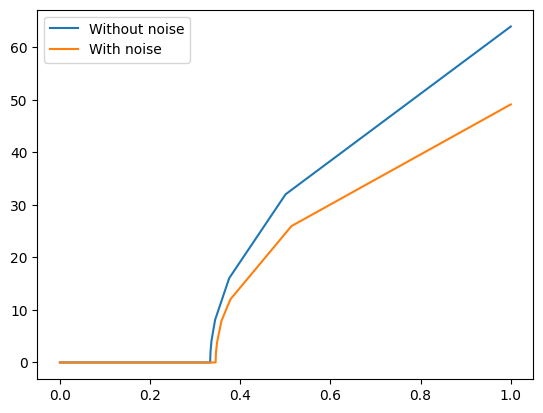

In [ ]:
no_noise = f(6,0)
noise = f(6,0.1)

plt.figure()
plt.plot(x[0,:], no_noise.forward(x).T, label = "Without noise")

plt.plot(x[0,:], noise.forward(x).T, label = "With noise")
plt.legend()

## 2(f) Interatction Between Detph and Width

Learning a piecewise smooth function from sample values


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

train_samples=10000

x_train=np.expand_dims(np.sort(np.random.uniform(0,1,train_samples)), 1)

#generate samples of y=sin(x * pi) for x\in[0,1) and y=x^2 for x\in[1/2,1]
def test_func(x):
    return np.sin(x*np.pi)*(x<1/2) + x**2*(x>=1/2)

y_train=test_func(x_train)

#uncommenting the below shows the samples
#plt.figure()
#plt.plot(x_train,y_train)

#we now train a network base on the samples (x_train,y_train) and evaluate it on x_test.

#consider varying the network width and depth,
#width and depth are controlled through the variables "width" and "depths respectively",

width=10
depth=10

model = Sequential()
model.add(Dense(width, input_dim=1, activation='relu'))

for i in range(depth-2):
  model.add(Dense(width, activation='relu'))

model.add(Dense(1))

model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer = 'adam',  metrics=['mse'])

model.fit(x_train, y_train, epochs=20, batch_size=32,verbose=1)

# scores = model.evaluate(X, y)
# print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
x_test=np.linspace(0,1,10000)
y_test = test_func(x_test)

x_test = np.expand_dims(x_test,  axis=1)
y_test_estimate = model(x_test)

plt.figure()
plt.plot(x_test,y_test_estimate, label = "fitted")
plt.plot(x_test, y_test, label = "ground truth")
plt.legend()

Try and do something similar to the code above - but for a 2-d function
